# Projet 1
## made by: José Lucas Barretto and Lucas Miguel Celinga Agrizzi

#### Married Womens's Annual Labor Supply

It is assumed that labor force participation depends on other sources of income, including husband's earnings (nwifeinc , measured in thousands of dollars), years of education (educ),past years of labor market experience (exper), age, number of children less than six years old (kidslt6), and number of kids between 6 and 18 years of age (kidsge6). 
Using the data in MROZ.txt from Mroz (1987) 428 of the 753 women in the sample report being in the labor force at some point during 1975.

In [1]:
#  1. inlf          =1 if in labor force, 1975
#  2. hours         hours worked, 1975
#  3. kidslt6       # kids < 6 years
#  4. kidsge6       # kids 6-18
#  5. age           woman's age in yrs
#  6. educ          years of schooling
#  7. wage          estimated wage from earns., hours
#  8. repwage       reported wage at interview in 1976
#  9. hushrs        hours worked by husband, 1975
# 10. husage        husband's age
#  11. huseduc      husband's years of schooling
#  12. huswage      husband's hourly wage, 1975
#  13. faminc       family income, 1975
#  14. mtr          fed. marginal tax rate facing woman
#  15. motheduc     mother's years of schooling
#  16. fatheduc     father's years of schooling
#  17. unem         unem. rate in county of resid.
#  18. city         =1 if live in SMSA
#  19. exper        actual labor mkt exper
#  20. nwifeinc     (faminc - wage*hours)/1000
#  21. lwage        log(wage)
#  22. expersq      exper^2

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('MROZ.txt', delim_whitespace=True, header = None)
df.columns = ['inlf', 'hours', 'kidslt6', 'kidsge6', 'age', 
              'educ', 'wage', 'repwage', 'hushrs', 'husage', 
              'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc',
              'fatheduc', 'unem', 'city', 'exper', 'nwifeinc', 'lwage', 'expersq']

#cleaning
df = df[df.wage!='.']
df.wage = df.wage.astype(float)
df.lwage = df.lwage.astype(float)

df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


#### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [3]:
df = df[df.wage>0]

#### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

In [4]:
# separate the data and create the functions
median_husWage = np.median(df.huswage.values)

#devide data with the median wage of husbands
df_bellow_median = df[df.huswage < median_husWage]
df_above_median  = df[df.huswage > median_husWage]


def descrip_stat(data):
    nrows = len(data)
    min_data = min(data)
    max_data = max(data)
    mean = np.average(data)
    var = np.var(data)
    median = np.median(data)
    return [nrows, min_data, max_data, mean, var, median]


def print_stats(name, data):
    print(name, ':\n')
    names = ['nrows:    ', 'min_data: ', 'max_data: ', 'mean:     ', 'var:      ', 'median:   ']
    stat = descrip_stat(data)
    for i in  range(len(names)):
        print(names[i], stat[i])
    print('*****')
       

In [5]:
# print for each statistique
print('For women which the husband earns LESS\nthan the median husbands wage\n')
print_stats('WAGE', df_bellow_median.wage)        
print_stats('AGE', df_bellow_median.age)        
print_stats('EDUCATION', df_bellow_median.educ)

print('\n\nFor women which the husband earns MORE\n than the median husbands wage\n')
print_stats('WAGE', df_above_median.wage)        
print_stats('AGE', df_above_median.age)        
print_stats('EDUCATION', df_above_median.educ)

For women which the husband earns LESS
than the median husbands wage

WAGE :

nrows:     214
min_data:  0.1282
max_data:  18.267
mean:      3.4585406542056076
var:       4.572157433253777
median:    2.9718
*****
AGE :

nrows:     214
min_data:  30
max_data:  60
mean:      41.66822429906542
var:       64.42730806183947
median:    41.0
*****
EDUCATION :

nrows:     214
min_data:  6
max_data:  17
mean:      12.074766355140186
var:       4.200017468774566
median:    12.0
*****


For women which the husband earns MORE
 than the median husbands wage

WAGE :

nrows:     214
min_data:  0.1616
max_data:  25.0
mean:      4.896822429906543
var:       16.258248838749235
median:    3.8464
*****
AGE :

nrows:     214
min_data:  30
max_data:  59
mean:      42.27570093457944
var:       54.33987684513931
median:    43.0
*****
EDUCATION :

nrows:     214
min_data:  5
max_data:  17
mean:      13.242990654205608
var:       5.5390863830902255
median:    12.0
*****


As we can notice, the woman with the husband who earns low usually earn less then the wifes who has a husband earning more, but the second one has more variance in the result.

We saw also that the education and age don't have much influence linked with the husband sallary.

All these affirmations are empirically.

#### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez


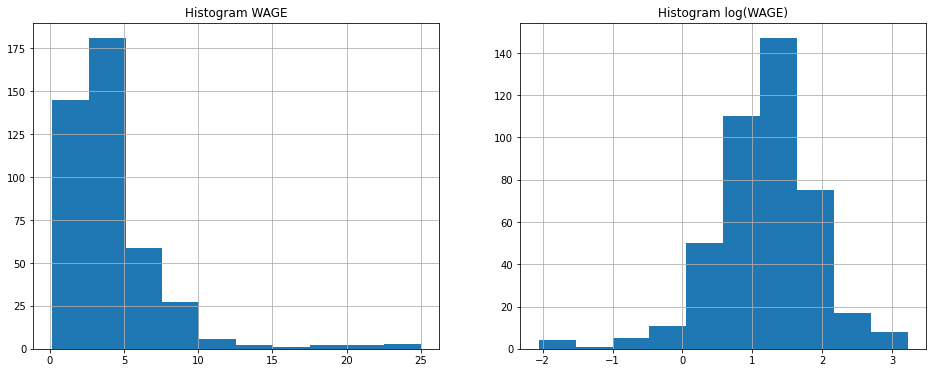

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Histogram WAGE')
plt.grid()
plt.hist(df.wage)

plt.subplot(122)
plt.title('Histogram log(WAGE)')
plt.grid()
plt.hist(np.log(df.wage))
plt.show()

The first graph looks the $wage$ is near a exponential distribution, otherwize the histogram from $log(WAGE)$ looks more like a normal distribution which is communly better to work with

#### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [7]:
print('Correlation coef: ',np.corrcoef(df.motheduc, df.fatheduc)[0][1])

Correlation coef:  0.554063218431168


This value of correlation is significant and can change the regression because a part of one of this variables can be decribed as a linear combination of the other variable and it could affect the result of the OLS

#### 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

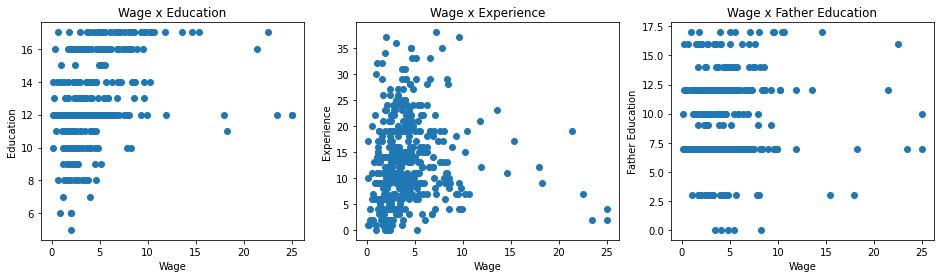

In [8]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plt.title('Wage x Education')
plt.xlabel('Wage')
plt.ylabel('Education')
plt.scatter(df.wage,df.educ)

plt.subplot(132)
plt.title('Wage x Experience')
plt.xlabel('Wage')
plt.ylabel('Experience')
plt.scatter(df.wage,df.exper)

plt.subplot(133)
plt.title('Wage x Father Education')
plt.xlabel('Wage')
plt.ylabel('Father Education')
plt.scatter(df.wage,df.fatheduc)

plt.show()


This graph can't show the data with the other variables constant, so we can note a simple relation between the wage and this other variables but there are a lot of interference from another variables in the wage value, who aren't associated with the other variable in the graph .

#### 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

To grant that the estimators are unbiased, we have to assume that:
    1. The model can be written as a linear combination of the variables
    2. The data has to be a random sample
    3. The data can not be in a perfect constant variable and a exact linear dependency between two independent variables
    4. The error must have a null expected value
    
Omitted variable bias is when a variable truly belongs in a model but is not expecified in the model, so your model exclude or underspecify a important variable of the regression. When you do this, the model will be unbiased if one of this conditions exists:
    1. The slope of the true variable is null
    2. The correlation with the true variable and all other variables in the model are null.

#### 7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

Residuals average:  3.984351789308973e-15
Residuals variance:  9.541620468108134
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.41e-10
Time:                        17:20:14   Log-Likelihood:                -1090.0
No. Observations:                 428   AIC:                             2194.
Df Residuals:                     421   BIC:                             2222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

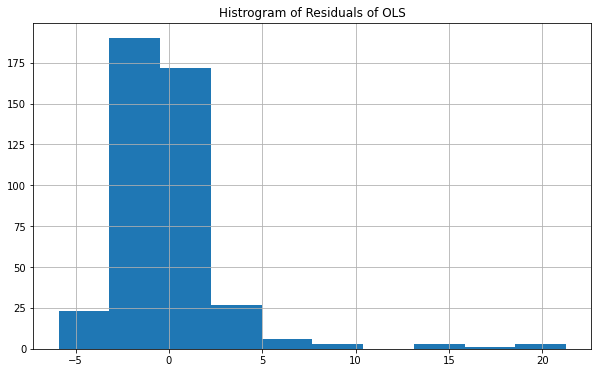

In [9]:
import statsmodels.api as sm

#select the variables to made the OLS
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6))
y = df.wage

# make the Linear Regression
model = sm.OLS(y,X)
result = model.fit()
residuals = result.resid
print('Residuals average: ', np.average(residuals))
print('Residuals variance: ', np.var(residuals))
print(result.summary())

#print the histogram of residuals
plt.figure(figsize=(10,6))
plt.grid()
plt.title('Histrogram of Residuals of OLS')
plt.hist(residuals)
plt.show()

The OLS make a regression  trying to aproximate the residual average to zero. As we can see, the residuals mean is next to the null value and it looks like a normal distribusction, but there are more values on the right of the curve making and their variance big. The variance is relationated with the goodness of a fit, when smaller is the variance, better is the fit.

#### 8. Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

Residuals average:  5.499235542535822e-16
Residuals variance:  0.4406307948426156
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        17:20:14   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

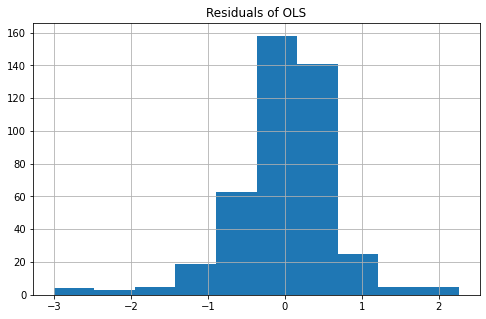

In [10]:
#select the variables to made the OLS
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6))
y = df.lwage

# make the Linear Regression
model = sm.OLS(y,X)
result = model.fit()
residuals = result.resid
print('Residuals average: ', np.average(residuals))
print('Residuals variance: ', np.var(residuals))
print(result.summary())

#print the histogram of residuals
plt.figure(figsize=(8,5))
plt.grid()
plt.title('Residuals of OLS')
plt.hist(residuals)
plt.show()

The avarage of the residuals keeps next to zero as expected, but the data is better distribucted around the zero making the variance beeing smaller then the other fitting, making this OLS better then the other.

#### 9. Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [11]:
from scipy.stats import norm
#extract the std error and coef
std = result.bse
coef = result.params

#take the t and P-values
t_values = coef/std
print('t-value: ', t_values[4])
p_values = norm.cdf(-1*abs(t_values))*2

print('Hipotesis Null H0: X4 = 0')
print('P-value of nwifeinc: ', p_values[4], '\n')

print('We can reject H0...')

print('...with  1% of significance. ', p_values[4] < 0.01)
print('...with  5% of significance. ', p_values[4] < 0.05)
print('...with 10% of significance. ', p_values[4] < 0.10)

t-value:  1.4659514850330615
Hipotesis Null H0: X4 = 0
P-value of nwifeinc:  0.1426615043172608 

We can reject H0...
...with  1% of significance.  False
...with  5% of significance.  False
...with 10% of significance.  False


With this result the p-value indicates the level of significance to reject the hypothesis, so:

    We can’t reject H0 with  1% of significance level
    We can’t reject H0 with  5% of significance level
    We can’t reject H0 with 10% of significance level


#### 10. Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [12]:
expected_value = 0.01

t_value_nwifeinc = (coef[4] - expected_value )/ std[4]
p_value_nwifeinc = norm.cdf(-1*abs(t_value_nwifeinc))*2


print('Hipotesis Null H0: X4 = 0.01')
print('P-value of nwifeinc: ', p_value_nwifeinc, '\n')

print('We can reject H0...')
print('...with  5% of significance. ', p_value_nwifeinc < 0.05)


Hipotesis Null H0: X4 = 0.01
P-value of nwifeinc:  0.12444300652693825 

We can reject H0...
...with  5% of significance.  False


We can not reject the hipotesis H0 because the p-value is bigger than the area of 5%. So we can assume that the "nwifeinc" coef: X4 = 0.01 with more than 5% level of significance.

#### 11. Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est égal à 0.05.

In [13]:
# Page 154
from scipy.stats import f

#------------- first OLS

#from previous exercises
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6))
y = df.lwage

# make the Linear Regression
model = sm.OLS(y,X)
result = model.fit()
residuals = result.resid
SSR0 = residuals.T @ residuals
print(SSR0)
print(result.summary())



188.58998019263947
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        17:20:15   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207 

In [14]:

#------------- second OLS

# hypotesis "nwifeinc" = 0.01 and "city" = 0.05
# implies    y - 0.01*nwifeinc - 0.05*city = const + X1*educ + X2*exper + X3*kidslt6 + X4*kidsge6
y1 = df.lwage - (0.01*df.nwifeinc) - (0.05*df.city)
X1 = np.column_stack((  df.city*0 +1,  df.educ,   df.exper,   df.kidslt6,   df.kidsge6))
# make the Linear Regression
model1 = sm.OLS(y1, X1)
result1 = model1.fit()
residuals1 = result1.resid
SSR1 = residuals1.T @ residuals1
print(SSR1)
print(result1.summary())


189.7878808521723
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     15.84
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           4.34e-12
Time:                        17:20:15   Log-Likelihood:                -433.28
No. Observations:                 428   AIC:                             876.6
Df Residuals:                     423   BIC:                             896.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4287      0.206  

In [15]:

#-------------- Compare the Hypotesis
n,k0 = np.shape(X)
n,k1 = np.shape(X1)
q = k0 - k1
# Find the F-statistics for the hypotesis and the p-value
F=((SSR1-SSR0)/q) / (SSR0/(n-k1))
p_values_q11 = f.sf(F,q,n-k1)
print('F-statistiques: ', F)
print('P-value of the hypotesis',p_values_q11,'\n')


# Find the F for 5% significance level
F_for_05per_cent = f.sf(0.05, q, n-k1)
print('F-statistiques for 5% of significance: ', F_for_05per_cent, '\n')

#if F > c we can reject the hypotesis
print('For the Hypotesis H0: "nwifeinc" = 0.01 and "city" = 0.05')
print('The afirmation "We can reject H0 with with  5% of significance." is:')
print(F < F_for_05per_cent)

F-statistiques:  1.3434223240937577
P-value of the hypotesis 0.26206212680994206 

F-statistiques for 5% of significance:  0.9512350455547315 

For the Hypotesis H0: "nwifeinc" = 0.01 and "city" = 0.05
The afirmation "We can reject H0 with with  5% of significance." is:
False


So we can't reject the hypotesis that "nwifeinc" = 0.01 and "city" = 0.05

#### 12. Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation et l’expérience professionnelle. Commentez

In [16]:
#select the variables to made the OLS
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X = np.column_stack((df.city*0 +1, df.educ,   df.exper))
y = df.wage

# make the Linear Regression
model = sm.OLS(y,X)
result = model.fit()
coefs = result.params
const = coefs[0]
educ = coefs[1]
exper = coefs[2]


print('wage =', round(const,3),'+',  round(educ,3), 'educ +', round(exper,3), 'exper')
# print(result.summary())

wage = -2.432 + 0.497 educ + 0.025 exper


These functions don't show all the information about wage, but can show the influence of the education and the experience in the wage. As we can notice, for the same experience, in each year more of education the wage increases 0.497 in average, and for the same education, each year of experience more, the wage incrieses in average 0.025.

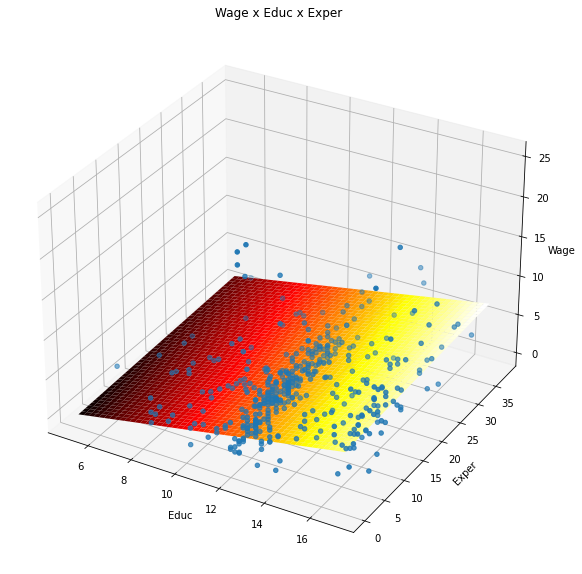

In [17]:
from mpl_toolkits.mplot3d import *
# import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


fig = plt.figure(figsize=(10,10))
# plt.figure(figsize=(8,5))
ax = fig.gca(projection='3d')               # to work in 3d
# plt.hold(True)

x_surf=np.arange(min(df.educ), max(df.educ), 0.01)                # generate a mesh
y_surf=np.arange(min(df.exper), max(df.exper), 0.01)  
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = const + educ*x_surf + exper* y_surf          # ex. function, which depends on x and y
ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.hot);    # plot a 3d surface plot


ax.scatter(df.educ, df.exper, df.wage);                        # plot a 3d scatter plot

ax.set_xlabel('Educ')
ax.set_ylabel('Exper')
ax.set_zlabel('Wage')
plt.title('Wage x Educ x Exper')
plt.show()


This graph is the aproximation from a OLS taking count all the variables cited in question 7, and can extract the information of the influence of Education and Experience in Wage. 

#### 13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

As we saw in the classes and in the book basis. To evaluate if two constants are equal, as $x_1=x_2$ in the linear system $y = x_1A+ x_2B + x_3C + CTE + u$. We can create $K = x_1 - x_2$ to the equation be like $y = (K)A+ x_2(A+B) + x_3C + CTE + u$ and we try to make the hypotesis that $H_0: K=0$

In [18]:
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = K = kidslt6, x6 = kidsge6 + kidslt6
X2 = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6 + df.kidslt6))
y2 = df.lwage

# We want to evaluate the x6 constant is null

# make the Linear Regression
model2 = sm.OLS(y2,X2)
result2 = model2.fit()
print(result2.summary())


                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        17:20:16   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [19]:
#extract the std error and coef
std2 = result2.bse
coef2 = result2.params

#take the t and P-values
t_values2 = coef2/std2
p_values2 = norm.cdf(-1*abs(t_values2))

print('Hipotesis Null H0: K=0')
print('P-value of K: ', p_values[5], '\n')

print('The afirmation "We can reject H0 with 5% of significance." is: ', p_values[5] < 0.05/2)


Hipotesis Null H0: K=0
P-value of K:  0.5953825243665627 

The afirmation "We can reject H0 with 5% of significance." is:  False


We don't reject that, with 5% of significance, $kidsge6 = kidslt6$

#### 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.



In [20]:
#from previous exercises
# model have the var:  const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X3 = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6))
y3 = df.wage

# make the Linear Regression
model3 = sm.OLS(y3,X3)
result3 = model3.fit()
residuals3 = result3.resid


# hypotesis H0: the homosdacity is valid
# y = u²  because of the residual
y4 = residuals3**2 

# make the Linear Regression
model4 = sm.OLS(y4, X3)
result4 = model4.fit()
# residuals4 = result4.resid
# SSR4 = residuals4.T @ residuals4
# print(SSR4)
R2_u2 = result4.rsquared
print(result4.summary())

n4,k4 = np.shape(X3)
F4 = (R2_u2/k4) / ((1-R2_u2) / (n4-k4-1))
p_values_q14 = result4.f_pvalue
print('F:  ', result4.fvalue)
print('P-value F stats: ', result4.f_pvalue)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.593
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.148
Time:                        17:20:16   Log-Likelihood:                -2207.4
No. Observations:                 428   AIC:                             4429.
Df Residuals:                     421   BIC:                             4457.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4856     13.111      0.113      0.9

#### 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans. Donnez les p-valeurs

Our hypothesis is H0: There isn't change in the structure when we split the data


So we have to do the Chow test with the F statistics:

$Fchow = (SSR_0- (sum(SSR_{splits}))*(n_0- 2k)    / ((sum(SSR_{splits}) * k)$

In [21]:
def SSR(df, min_age, max_age):
    
    mask = np.logical_and(df.age <= max_age, df.age >= min_age)
    # model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6

    X = np.column_stack((df.city[mask]*0 +1, df.city[mask],   df.educ[mask],   df.exper[mask],   df.nwifeinc[mask],   df.kidslt6[mask],   df.kidsge6[mask]))
    y = df.lwage[mask]

    # make the Linear Regression
    model = sm.OLS(y,X)
    result = model.fit()
    p_values = result.pvalues
#     print(result.summary())
    residuals = result.resid
    SSR = residuals.T @ residuals

    return SSR

In [22]:

# calculate the errors for the group more and less than 43
SSR_0 = SSR(df, 0, max(df.age))
SSR_less43 = SSR(df, 0, 42)
SSR_more43 = SSR(df, 43, max(df.age))

SSR_all = SSR_less43 + SSR_more43

#calculate the F_chow information and p-value
F_chow = ((SSR_0 - SSR_all)/SSR_all)*((n-2*7)/7)
P_value_chow = f.sf(F_chow,7,n-7)
print('F_chow:',F_chow)
print('P_value_chow: ',P_value_chow)

F_chow: 1.185087494108328
P_value_chow:  0.30992856833171517


With this, we can’t reject H0with 5%of significance level and can split the data.


In [23]:

# calculate the errors for the group less30 , between 30 and 43 and more 43
SSR_0 = SSR(df, 0, max(df.age))
SSR_less30 = SSR(df, 0, 30)
SSR_bet30and43 = SSR(df, 31, 42)
SSR_more43 = SSR(df, 43, max(df.age))

SSR_all = SSR_less30 + SSR_bet30and43 + SSR_more43

#calculate the F_chow information and p-value
F_chow = ((SSR_0 - SSR_all)/SSR_all)*((n-2*7)/7)
P_value_chow = f.sf(F_chow,7,n-7)
print('F_chow:',F_chow)
print('P_value_chow: ',P_value_chow)

F_chow: 1.5325563045387744
P_value_chow:  0.1543366002543548


With this, we can’t reject H0with 5%of significance level and can split the data.


#### 16. Construire les variables binaires correspondant à l’âge des femmes de la question 15. Refaire la question 8 en ajoutant ces variables et en utilisant comme référence les femmes qui ont moins de 30 ans. Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs.

In [24]:
age_above30 = np.array(df.age)
age_above43 = np.array(df.age)

age_above30[age_above30<=30]=0
age_above30[age_above30>=43]=0
age_above30[age_above30>30]=1

age_above43[age_above43<43]=0
age_above43[age_above43>=43]=1

X5 = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6, age_above30, age_above43))
y5 = df.lwage

# make the Linear Regression
model5 = sm.OLS(y5,X5)
result5 = model5.fit()
residuals5 = result5.resid
SSR5 = residuals5.T @ residuals5
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           7.08e-13
Time:                        17:20:17   Log-Likelihood:                -430.46
No. Observations:                 428   AIC:                             878.9
Df Residuals:                     419   BIC:                             915.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2210      0.248     -0.893      0.3

Assuming the P-values of X7 and X8 individually, we can't reject the hypotesis that each one is null significy. So we're going to make the test from both null.

In [25]:
#------------- second OLS -> 

#from previous exercises
# model have the var: const,     x1 = city, x2 = educ, x3 = exper, x4 = nwifeinc, x5 = kidslt6, x6 = kidsge6
X = np.column_stack((df.city*0 +1, df.city,   df.educ,   df.exper,   df.nwifeinc,   df.kidslt6,   df.kidsge6))
y = df.lwage

# make the Linear Regression
model = sm.OLS(y,X)
result = model.fit()
residuals = result.resid
SSR0 = residuals.T @ residuals
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     12.92
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.00e-13
Time:                        17:20:17   Log-Likelihood:                -431.92
No. Observations:                 428   AIC:                             877.8
Df Residuals:                     421   BIC:                             906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.207     -1.927      0.0

In [26]:
# -------------- Compare the Hypotesis
n5,k0 = np.shape(X)
n5,k5 = np.shape(X5)
q5 = k5 - k0
print(SSR0, SSR5)
# Find the F-statistics for the hypotesis and the p-value
F_q16=((SSR0-SSR5)/q5)/(SSR5/(n5-k0))
p_values_q16 = f.sf(F_q16,q5,n5-k0)
print('\nF-statistiques: ', F_q16)
print('P-value of the hypotesis',p_values_q16,'\n')


#if F > c we can reject the hypotesis
print('For the Hypotesis H0: age_above30 = age_above43 = 0')
print('The afirmation "We can reject H0 with with  5% of significance." is:')
print(F_q16 < 0.05)


188.58998019263947 187.30681260001558

F-statistiques:  1.442055280840906
P-value of the hypotesis 0.23760676040907033 

For the Hypotesis H0: age_above30 = age_above43 = 0
The afirmation "We can reject H0 with with  5% of significance." is:
False


So, we can reject the hypotesis that both of the binary variables are nulls with 5% level of significance.

The interpretation from the result is that if the woman has the age between 30 and 43 years she wins $16.18\%$ less than the woman with less or equal 30 years.

And the woman with more or equal than 43 years wins $25.5\%$ less than the woman with $less or equal 30 years.